# Generación de gráficas Laboratorio 2 - parte 2

### Algoritmo de Hammming 7-4

In [85]:
# Leer el archivo CSV generado por Java
with open('./csv/SenderHamming.csv', mode='r') as archivo_java:
    palabras_senderh = [line.strip() for line in archivo_java]

In [86]:
# Leer el archivo CSV generado por Python
with open('./csv/ReceiverHamming.csv', mode='r') as archivo_python:
    palabras_receiverh = [line.strip() for line in archivo_python]

In [87]:
# Comparar las palabras y contar cuántas no son iguales
palabras_no_igualesh = 0
for palabras_senderh, palabras_receiverh in zip(palabras_senderh, palabras_receiverh):
    if palabras_senderh != palabras_receiverh:
        palabras_no_igualesh += 1

In [88]:
print(f"Número de palabras no iguales: {palabras_no_igualesh}")


Número de palabras no iguales: 5143


### Algoritmo CRC-32

In [89]:
# Leer el archivo CSV generado por Java
with open('./csv/SenderCRC.csv', mode='r') as archivo_java:
    palabras_senderc = [line.strip() for line in archivo_java]

In [90]:
# Leer el archivo CSV generado por Python
with open('./csv/ReceiverCRC.csv', mode='r') as archivo_python:
    palabras_receiverc = [line.strip() for line in archivo_python]

In [91]:
# Comparar las palabras y contar cuántas no son iguales
palabras_no_igualesc = 0
for palabras_senderc, palabras_receiverc in zip(palabras_senderc, palabras_receiverc):
    if palabras_senderc != palabras_receiverc:
        palabras_no_igualesc += 1

In [92]:
print(f"Número de palabras no iguales: {palabras_no_igualesc}")

Número de palabras no iguales: 4436


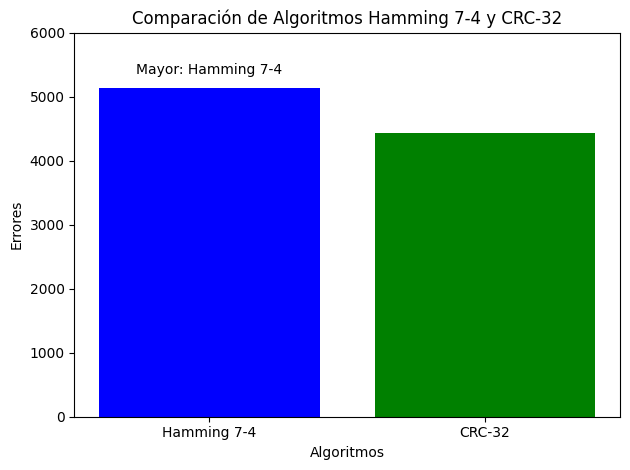

In [97]:
import matplotlib.pyplot as plt

pals = ["Hamming 7-4", "CRC-32"]
valores = [palabras_no_igualesh, palabras_no_igualesc]

plt.bar(pals, valores, color=['blue', 'green'])
# Agregar etiquetas y título
plt.xlabel('Algoritmos')
plt.ylabel('Errores')
plt.title('Comparación de Algoritmos Hamming 7-4 y CRC-32')

# Encontrar la variable mayor
variable_mayor = pals[valores.index(max(valores))]

# Anotar el valor de la variable mayor
plt.annotate(f'Mayor: {variable_mayor}', (variable_mayor, max(valores)),
             textcoords="offset points", xytext=(0,10), ha='center')

# Ajustar la escala en el eje Y
plt.ylim(0, 6000)  # Establecer límites en Y (ajusta los valores según tus necesidades)

# Mostrar la gráfica
plt.tight_layout()  # Ajustar el diseño para evitar recortes
# Mostrar la gráfica
plt.show()